<a href="https://colab.research.google.com/github/DAUN3046/news_wordcloud/blob/main/%EB%89%B4%EC%8A%A4_5%EA%B0%9C%EB%85%84_wordcloud_it%EA%B8%88%EC%9C%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 환경 세팅

## 1-1. 라이브러리 설치

### 가. pip 명령어

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Fetched 261 kB in 7s (40.1 kB/s)
Reading package li

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp38-cp38-linux_x86_64.whl size=142126 sha256=af9ea6fd478e874159847b24bffaf6ddfa6f4f51ce2286f3a89f24367a7bc48b
  Stored in directory: /root/.cache/pip/wheels/e3/88/e7/a947778cce3c142d5721c0629e05db7b09979d3a973277ec2f
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


### 나. import 명령어

In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import *
import re
import seaborn as sns

## 1-2. 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 데이터 불러오기

## 2-1. 드라이브 마운트

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2-2. 데이터 읽기

In [ ]:
df_2018 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2018-itf.xlsx')
df_2019 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2019-itf.xlsx')
df_2020 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2020-itf.xlsx')
df_2021 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2021-itf.xlsx')
df_2022 = pd.read_excel('/content/gdrive/MyDrive/newsdata/2022-itf.xlsx')

## 2-3. 데이터 확인

In [ ]:
df_2022.head()

,Unnamed: 0,date,title,source,contents,link
0,0,21시간 전,"태광그룹, 첨단 섬유·금융센터에 10년간 12조 투자",서울경제,동시에 고비용이 투입되는 정보기술(IT) 하드웨어 시스템 리뉴얼 작업도 빠르게 진행...,https://www.sedaily.com/NewsView/26EYPLVKP9
1,1,1일 전,해운-가전-금융 등 감원 칼바람… “내년 경기침체 대비”,동아일보언론사 선정,신종 코로나바이러스 감염증(코로나19) 이후 정보기술(IT) 기업 중심으로 한동안 ...,https://www.donga.com/news/article/all/2022121...
2,2,4일 전,안정 택한 KB금융…증권·손보 등 7개社 대표 유임,한국경제,김 내정자는 국민은행 IT기획부장과 여신IT부장 등을 거친 금융 IT 전문가로 꼽힌...,https://www.hankyung.com/economy/article/20221...
3,3,5일 전,[인사] 금융감독원,파이낸셜뉴스,서재완 △IT검사국장 장성옥 △금융그룹감독실장 김형원 △보험영업검사실장 김금태 △은...,http://www.fnnews.com/news/202212141933104958
4,4,1일 전,"정상원 이스트소프트 대표 ""IT기업 '신발 속 돌멩이' 치울 것""",한국경제,“국내 정보기술(IT) 기업들의 신발 속 돌멩이를 치우는 역할을 하겠습니다.” 한국...,https://www.hankyung.com/it/article/2022121840191


# 3. 전처리

## 3-1. 사용 컬럼 추출

In [ ]:
df_2018_result = df_2018['title']
df_2019_result = df_2019['title']
df_2020_result = df_2020['title']
df_2021_result = df_2021['title']
df_2022_result = df_2022['title']

## 3-2. 괄호 문자 제거
기사 제목의 [] 괄호 안에 필요 없는 말이 단어가 들어가 있는 경우가 많으므로 제거한다.

In [ ]:
regex="\[.*\]|\s-\s.*"

In [ ]:
for i in range(len(df_2018_result)):
  df_2018_result[i] = re.sub(regex, '', df_2018_result[i])
for i in range(len(df_2019_result)):
  df_2019_result[i] = re.sub(regex, '', df_2019_result[i])
for i in range(len(df_2020_result)):
  df_2020_result[i] = re.sub(regex, '', df_2020_result[i])
for i in range(len(df_2021_result)):
  df_2021_result[i] = re.sub(regex, '', df_2021_result[i])
for i in range(len(df_2022_result)):
  df_2022_result[i] = re.sub(regex, '', df_2022_result[i])

<ipython-input-15-c480aab715eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_result[i] = re.sub(regex, '', df_2018_result[i])
<ipython-input-15-c480aab715eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_result[i] = re.sub(regex, '', df_2019_result[i])
<ipython-input-15-c480aab715eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_result[i] = re.sub(regex, '', df_2020_result[i])
<ipython-input-15-c480aab

## 3-3. 토큰화

### 가. 형태소 담을 리스트 생성

In [ ]:
text_2018 = list()
text_2019 = list()
text_2020 = list()
text_2021 = list()
text_2022 = list()

### 나. 형태소 분리

In [ ]:
okt = Okt()

In [ ]:
for i in range(len(df_2018)):
  text_2018 += okt.nouns(str(df_2018_result[i]))
for i in range(len(df_2019)):
  text_2019 += okt.nouns(str(df_2019_result[i]))
for i in range(len(df_2020)):
  text_2020 += okt.nouns(str(df_2020_result[i]))
for i in range(len(df_2021)):
  text_2021 += okt.nouns(str(df_2021_result[i]))
for i in range(len(df_2022)):
  text_2022 += okt.nouns(str(df_2022_result[i]))

### 다. 키워드 뽑기 - *태그 개수 설정 가능*

In [ ]:
counts_2018 = Counter(text_2018)
tags_2018 = counts_2018.most_common(200) # 넉넉히 잡아서 솎아내기 위해 200개 뽑음
counts_2019 = Counter(text_2019)
tags_2019 = counts_2019.most_common(200)
counts_2020 = Counter(text_2020)
tags_2020 = counts_2020.most_common(200)
counts_2021 = Counter(text_2021)
tags_2021 = counts_2021.most_common(200)
counts_2022 = Counter(text_2022)
tags_2022 = counts_2022.most_common(200)

### 라. 태그 확인

#### 2018

In [ ]:
tags_2018

[('금융', 474),
 ('기업', 262),
 ('삼성', 188),
 ('은행', 187),
 ('투자', 179),
 ('혁신', 162),
 ('블록', 157),
 ('체인', 156),
 ('한국', 152),
 ('규제', 149),
 ('테크', 142),
 ('산업', 128),
 ('디지털', 122),
 ('증시', 120),
 ('핀', 114),
 ('글로벌', 113),
 ('시장', 108),
 ('펀드', 106),
 ('전자', 104),
 ('실적', 102),
 ('기술', 101),
 ('인터넷', 98),
 ('등', 95),
 ('차', 95),
 ('주', 90),
 ('경제', 84),
 ('내년', 73),
 ('분리', 73),
 ('전쟁', 72),
 ('반도체', 72),
 ('대표', 71),
 ('화폐', 71),
 ('그룹', 70),
 ('위', 70),
 ('명', 70),
 ('무역', 69),
 ('정부', 69),
 ('해외', 68),
 ('클라우드', 67),
 ('시대', 67),
 ('더', 67),
 ('완화', 67),
 ('은산', 66),
 ('성장', 65),
 ('결제', 65),
 ('사', 64),
 ('플랫폼', 64),
 ('사업', 63),
 ('코스피', 63),
 ('미래', 61),
 ('외', 59),
 ('것', 58),
 ('중', 58),
 ('로', 57),
 ('도입', 57),
 ('국내', 57),
 ('서비스', 56),
 ('세계', 55),
 ('데이터', 55),
 ('코스닥', 55),
 ('일자리', 53),
 ('산업혁명', 53),
 ('가상', 52),
 ('최대', 52),
 ('확대', 52),
 ('네이버', 52),
 ('채용', 51),
 ('첫', 50),
 ('카카오', 50),
 ('빅데이터', 50),
 ('시스템', 49),
 ('중국', 49),
 ('인재', 48),
 ('제', 46),
 ('외국인', 46)

#### 2019

In [ ]:
tags_2019

#### 2020

In [ ]:
tags_2020

#### 2021

In [ ]:
tags_2021

#### 2022

In [ ]:
tags_2022

### 태그 수정 > *논의 후 설정*
전치사, 관련 없는 단어 등을 솎아준다.

#### 2018

In [ ]:
tags_2018 = [('은행', 187),
 ('투자', 179),
 ('혁신', 162),
 ('블록체인', 157),
 ('한국', 152),
 ('규제', 149),
 ('테크', 142),
 ('산업', 128),
 ('디지털', 122),
 ('증시', 120),
 ('핀테크', 114),
 ('글로벌', 113),
 ('시장', 108),
 ('펀드', 106),
 ('실적', 102),
 ('기술', 101),
 ('인터넷', 98),
 ('차', 95),
 ('경제', 84),
 ('분리', 73),
 ('전쟁', 72),
 ('반도체', 72),
 ('화폐', 71),
 ('무역', 69),
 ('정부', 69),
 ('해외', 68),
 ('클라우드', 67),
 ('시대', 67),
 ('완화', 67),
 ('은산', 66),
 ('성장', 65),
 ('결제', 65),
 ('플랫폼', 64),
 ('코스피', 63),
 ('미래', 61),
 ('도입', 57),
 ('국내', 57),
 ('서비스', 56),
 ('세계', 55),
 ('데이터', 55),
 ('코스닥', 55),
 ('일자리', 53),
 ('산업혁명', 53),
 ('가상', 52),
 ('최대', 52),
 ('확대', 52),
 ('네이버', 52),
 ('채용', 51),
 ('카카오', 50),
 ('빅데이터', 50),
 ('시스템', 49),
 ('중국', 49),
 ('인재', 48),
 ('외국인', 46),
 ('하나', 45),
 ('농협', 45),
 ('증권', 44),
 ('바이오', 44),
 ('뱅크', 43),
 ('페이', 43),
 ('영업', 43),
 ('주식', 42),
 ('금리', 42),
 ('전략', 41),
 ('하반기', 41),
 ('보안', 41),
 ('정보', 41),
 ('스타트업', 41),
 ('통신', 41),
 ('고객', 40),
 ('지원', 40),
 ('거래소', 40),
 ('카드', 39),
 ('창업', 38),
 ('미국', 38),
 ('대출', 37),
 ('인사', 36),
 ('활용', 36),
 ('보험', 36),
 ('금감원', 34),
 ('반등', 34),
 ('암호', 33),
 ('경쟁', 32),
 ('진출', 32),
 ('개발', 32),
 ('기대', 32),
 ('위기', 32),
 ('수출', 32),
 ('정책', 32),
 ('구축', 31),
 ('회사', 31),
 ('상장', 30),
 ('거래', 30),
 ('센터', 30),
 ('경영', 30),
 ('개혁', 29),
 ('대통령', 29),
 ('논란', 29),
 ('관리', 28),
 ('스마트', 28),
 ('전문', 27),
 ('대응', 27),
 ('통합', 27),
 ('추진', 27),
 ('롯데', 27),
 ('장사', 27),
 ('변동성', 27),
 ('강화', 26),
 ('전환', 26),
 ('국민은행', 26),
 ('증권사', 26),
 ('대기업', 26),
 ('경기', 26),
 ('기회', 26),
 ('자산', 26),
 ('은행권', 26),
 ('법', 25),
 ('인상', 25),
 ('인력', 24),
 ('우려', 24),
 ('국민연금', 24),
 ('전망', 24),
 ('효과', 24),
 ('간편', 24),
 ('지주', 23),
 ('애플', 23),
 ('전기', 23),
 ('업무', 22),
 ('확산', 22),
 ('평가', 22),
 ('베트남', 22),
 ('개선', 22),
 ('전문가', 22),
 ('구글', 22),
 ('성공', 22),
 ('게임', 22),
 ('상승', 22),
 ('인프라', 21),
 ('주가', 21),
 ('한화', 21),
 ('선도', 21),
 ('서울', 21),
 ('이익', 21),
 ('부동산', 21),
 ('하락', 21)]

#### 2019

In [ ]:
tags_2019 = [('디지털', 215),
 ('은행', 207),
 ('테크', 184),
 ('한국', 169),
 ('혁신', 167),
 ('클라우드', 161),
 ('투자', 151),
 ('핀테크', 134),
 ('글로벌', 126),
 ('시장', 120),
 ('경제', 104),
 ('산업', 96),
 ('기술', 94),
 ('규제', 93),
 ('성장', 88),
 ('네이버', 88),
 ('카카오', 86),
 ('인터넷', 86),
 ('데이터', 85),
 ('펀드', 82),
 ('서비스', 81),
 ('시대', 81),
 ('플랫폼', 79),
 ('해외', 79),
 ('증시', 73),
 ('실적', 73),
 ('반도체', 71),
 ('국내', 69),
 ('인재', 69),
 ('블록체인', 69),
 ('증권', 68),
 ('보험', 64),
 ('보안', 62),
 ('하나', 61),
 ('코스피', 59),
 ('솔루션', 59),
 ('세계', 58),
 ('채용', 53),
 ('정부', 52),
 ('결제', 50),
 ('뱅크', 50),
 ('시스템', 49),
 ('전쟁', 49),
 ('무역', 49),
 ('영업', 48),
 ('미래', 47),
 ('중국', 47),
 ('차', 47),
 ('경쟁', 46),
 ('인사', 45),
 ('지원', 44),
 ('페이', 43),
 ('자산', 43),
 ('스타트업', 43),
 ('고객', 42),
 ('구글', 41),
 ('강화', 39),
 ('센터', 39),
 ('수익률', 39),
 ('전환', 38),
 ('확대', 38),
 ('업계', 37),
 ('수출', 37),
 ('전략', 36),
 ('하반기', 36),
 ('토스', 35),
 ('금리', 35),
 ('개발', 35),
 ('거래', 35),
 ('농협', 35),
 ('금감원', 35),
 ('인력', 35),
 ('코스닥', 35),
 ('일자리', 34),
 ('공략', 34),
 ('카드', 34),
 ('주식', 33),
 ('정보', 33),
 ('수익', 33),
 ('외국인', 32),
 ('통합', 32),
 ('경기', 32),
 ('기회', 31),
 ('오픈', 31),
 ('뱅킹', 31),
 ('바이오', 31),
 ('현대', 31),
 ('직원', 30),
 ('화폐', 30),
 ('반등', 30),
 ('배당', 29),
 ('위기', 29),
 ('진출', 29),
 ('경영', 29),
 ('스마트', 29),
 ('부진', 28),
 ('최고', 28),
 ('업무', 28),
 ('법', 28),
 ('전문가', 28),
 ('산업혁명', 28),
 ('우리', 27),
 ('화웨이', 27),
 ('정책', 27),
 ('회복', 27),
 ('주가', 27),
 ('전망', 27),
 ('도약', 26),
 ('본격', 26),
 ('미국', 26),
 ('개선', 25),
 ('인프라', 25),
 ('구축', 25),
 ('목표', 25),
 ('도입', 25),
 ('우리금융', 25),
 ('시작', 25),
 ('모바일', 25),
 ('대기업', 25),
 ('전문', 25),
 ('자금', 25),
 ('공공', 24),
 ('대출', 24),
 ('빅데이터', 24),
 ('지능', 24),
 ('기대', 24),
 ('도전', 24),
 ('인수', 24),
 ('국민연금', 24),
 ('보복', 24),
 ('주도', 23),
 ('확산', 23),
 ('사회', 23),
 ('차세대', 23),
 ('트럼프', 23),
 ('생태계', 23),
 ('주주', 23),
 ('증권사', 23),
 ('경쟁력', 23),
 ('창업', 23),
 ('융합', 22),
 ('협력', 22),
 ('통신', 22),
 ('아마존', 22),
 ('돈', 22),
 ('암호', 22)]

#### 2020

In [ ]:
tags_2020 = [('코로나', 316),
 ('디지털', 275),
 ('투자', 195),
 ('데이터', 168),
 ('테크', 165),
 ('네이버', 148),
 ('은행', 146),
 ('혁신', 142),
 ('산업', 133),
 ('증시', 131),
 ('시대', 129),
 ('한국', 127),
 ('카카오', 127),
 ('시장', 120),
 ('펀드', 118),
 ('글로벌', 113),
 ('클라우드', 106),
 ('핀테크', 104),
 ('실적', 98),
 ('성장', 91),
 ('서비스', 90),
 ('사업', 89),
 ('플랫폼', 88),
 ('언택트', 88),
 ('기술', 81),
 ('코스피', 80),
 ('인사', 77),
 ('주식', 74),
 ('경제', 74),
 ('증권', 71),
 ('그룹', 69),
 ('보험', 69),
 ('뉴딜', 66),
 ('전환', 64),
 ('규제', 61),
 ('비대면', 60),
 ('세계', 60),
 ('채용', 59),
 ('미래', 58),
 ('최대', 58),
 ('시스템', 58),
 ('반도체', 58),
 ('빅', 57),
 ('개미', 56),
 ('마이', 53),
 ('보안', 53),
 ('위기', 53),
 ('센터', 52),
 ('결제', 51),
 ('자산', 51),
 ('해외', 50),
 ('구축', 48),
 ('정부', 48),
 ('하나', 46),
 ('차', 45),
 ('인재', 44),
 ('회복', 44),
 ('지원', 43),
 ('종합', 42),
 ('외국인', 42),
 ('정보', 41),
 ('주가', 41),
 ('경쟁', 39),
 ('전쟁', 39),
 ('바이오', 39),
 ('경영', 39),
 ('초', 39),
 ('국내', 39),
 ('확대', 38),
 ('영업', 38),
 ('빅데이터', 38),
 ('고객', 37),
 ('솔루션', 37),
 ('포스트', 37),
 ('페이', 37),
 ('하반기', 37),
 ('돈', 36),
 ('강화', 36),
 ('중국', 36),
 ('스마트', 36),
 ('기회', 35),
 ('종목', 35),
 ('법', 35),
 ('뱅크', 35),
 ('대기업', 35),
 ('코스닥', 35),
 ('수익률', 35),
 ('카드', 34),
 ('토스', 34),
 ('시작', 34),
 ('상승', 34),
 ('스타트업', 32),
 ('진출', 32),
 ('바이든', 32),
 ('재택근무', 32),
 ('농협', 31),
 ('유동성', 31),
 ('인력', 31),
 ('블록체인', 31),
 ('도입', 31),
 ('수출', 31),
 ('인증', 30),
 ('도전', 29),
 ('사회', 29),
 ('우리금융', 29),
 ('공인', 29),
 ('대출', 29),
 ('국민', 29),
 ('트럼프', 29),
 ('취업', 28),
 ('금감원', 28),
 ('인증서', 28),
 ('개선', 28),
 ('규모', 28),
 ('사상', 28),
 ('매출', 28),
 ('고용', 28),
 ('경기', 28),
 ('우리', 27),
 ('속도', 27),
 ('맞춤', 27),
 ('돌파', 27),
 ('통합', 27),
 ('현대차', 27),
 ('업체', 26),
 ('공채', 26),
 ('날개', 26),
 ('상장', 26),
 ('자금', 26),
 ('통신', 25),
 ('금리', 25),
 ('헬', 25),
 ('문화', 25),
 ('대선', 25),
 ('일자리', 24),
 ('대형', 24),
 ('차세대', 24),
 ('기대', 24),
 ('헬스케어', 24),
 ('생명', 24),
 ('기반', 24),
 ('금융위기', 24),
 ('증권사', 24),
 ('핵심', 24),
 ('세대', 24),
 ('가치', 24),
 ('우려', 23),
 ('집중', 23),
 ('주도', 23)]

#### 2021

In [ ]:
tags_2021 = [('디지털', 238),
 ('투자', 186),
 ('테크', 171),
 ('플랫폼', 161),
 ('은행', 150),
 ('카카오', 150),
 ('데이터', 144),
 ('혁신', 124),
 ('클라우드', 119),
 ('시장', 105),
 ('사업', 102),
 ('기술', 102),
 ('한국', 102),
 ('네이버', 96),
 ('실적', 96),
 ('메타버스', 95),
 ('반도체', 95),
 ('시대', 94),
 ('서비스', 93),
 ('코로나', 92),
 ('산업', 88),
 ('규제', 85),
 ('인사', 85),
 ('증시', 83),
 ('글로벌', 82),
 ('빅', 80),
 ('코스피', 72),
 ('핀테크', 70),
 ('성장', 70),
 ('마이', 69),
 ('펀드', 69),
 ('전환', 67),
 ('최대', 65),
 ('인재', 65),
 ('채용', 63),
 ('증권', 60),
 ('경제', 60),
 ('미래', 60),
 ('정부', 58),
 ('업계', 58),
 ('국내', 58),
 ('세계', 58),
 ('스타트업', 57),
 ('대출', 55),
 ('하나', 54),
 ('자산', 53),
 ('보안', 53),
 ('지원', 52),
 ('경쟁', 51),
 ('주식', 51),
 ('보험', 50),
 ('뱅크', 50),
 ('개미', 50),
 ('상장', 47),
 ('개발자', 46),
 ('해외', 46),
 ('시스템', 45),
 ('가상', 44),
 ('화폐', 44),
 ('인력', 43),
 ('최고', 43),
 ('고객', 43),
 ('영업', 42),
 ('토스', 42),
 ('매출', 41),
 ('강화', 40),
 ('카뱅', 40),
 ('교육', 39),
 ('카드', 39),
 ('페이', 39),
 ('코스닥', 39),
 ('돈', 38),
 ('솔루션', 38),
 ('청년', 37),
 ('게임', 37),
 ('확대', 37),
 ('거래', 37),
 ('주가', 37),
 ('외국인', 37),
 ('세대', 35),
 ('경영', 35),
 ('개발', 35),
 ('상승', 35),
 ('전략', 34),
 ('구축', 34),
 ('전쟁', 34),
 ('거래소', 34),
 ('금리', 34),
 ('역대', 33),
 ('앱', 33),
 ('중국', 33),
 ('수익률', 32),
 ('업무', 31),
 ('체인', 31),
 ('인터넷', 30),
 ('대기업', 30),
 ('직원', 30),
 ('연봉', 30),
 ('종목', 30),
 ('부동산', 30),
 ('농협', 29),
 ('전문가', 29),
 ('맞춤', 29),
 ('센터', 28),
 ('집중', 28),
 ('법', 28),
 ('인수', 27),
 ('평가', 27),
 ('협력', 27),
 ('공략', 27),
 ('반등', 27),
 ('다시', 27),
 ('시작', 26),
 ('중심', 26),
 ('수수료', 26),
 ('블록체인', 26),
 ('돌파', 26),
 ('추진', 25),
 ('우려', 25),
 ('금감원', 25),
 ('스마트', 25),
 ('코인', 25),
 ('매수', 24),
 ('기대', 24),
 ('미국', 24),
 ('기반', 24),
 ('초', 24),
 ('창업', 24),
 ('수출', 24),
 ('헬스케어', 23),
 ('한화', 23),
 ('대응', 23),
 ('바람', 23),
 ('출시', 23),
 ('위기', 23),
 ('사상', 23),
 ('모바일', 23),
 ('차세대', 23),
 ('인플레', 23),
 ('종합', 22),
 ('정책', 22),
 ('일자리', 22),
 ('출범', 22),
 ('차', 22),
 ('사회', 22)]

#### 2022

In [ ]:
tags_2022 = [('투자', 219),
 ('디지털', 185),
 ('테크', 138),
 ('데이터', 128),
 ('실적', 128),
 ('반도체', 128),
 ('시장', 116),
 ('은행', 115),
 ('혁신', 113),
 ('플랫폼', 101),
 ('클라우드', 95),
 ('증시', 92),
 ('기술', 91),
 ('산업', 91),
 ('시대', 90),
 ('카카오', 88),
 ('서비스', 85),
 ('코스피', 84),
 ('글로벌', 81),
 ('성장', 76),
 ('인사', 75),
 ('빅테크', 71),
 ('채용', 69),
 ('매출', 67),
 ('경제', 67),
 ('전환', 66),
 ('규제', 64),
 ('미래', 63),
 ('핀테크', 61),
 ('증권', 60),
 ('위기', 59),
 ('세계', 57),
 ('보험', 57),
 ('최대', 56),
 ('인재', 55),
 ('센터', 54),
 ('정부', 54),
 ('보안', 53),
 ('고객', 53),
 ('스타트업', 52),
 ('자산', 51),
 ('메타버스', 51),
 ('개발', 51),
 ('개미', 50),
 ('하나', 48),
 ('펀드', 48),
 ('확대', 47),
 ('영업', 47),
 ('업계', 46),
 ('주가', 46),
 ('초', 46),
 ('수출', 46),
 ('앱', 44),
 ('전망', 44),
 ('코로나', 42),
 ('부산', 42),
 ('상장', 42),
 ('반등', 42),
 ('네이버', 41),
 ('금리', 41),
 ('청년', 40),
 ('국내', 40),
 ('인력', 38),
 ('지원', 38),
 ('경쟁', 38),
 ('시스템', 38),
 ('블록체인', 38),
 ('경기', 37),
 ('유치', 37),
 ('관리', 37),
 ('게임', 37),
 ('대기업', 36),
 ('카드', 36),
 ('마이', 36),
 ('솔루션', 36),
 ('주식', 36),
 ('올해', 35),
 ('침체', 34),
 ('기회', 34),
 ('육성', 33),
 ('역대', 33),
 ('전략', 33),
 ('우려', 32),
 ('중국', 32),
 ('통합', 31),
 ('우리', 31),
 ('강화', 31),
 ('외국인', 30),
 ('경영', 30),
 ('하락', 30),
 ('전쟁', 30),
 ('인상', 30),
 ('인플레', 29),
 ('진출', 29),
 ('연봉', 29),
 ('연금', 29),
 ('바닥', 29),
 ('페이', 28),
 ('개발자', 28),
 ('거래', 28),
 ('이익', 28),
 ('물가', 28),
 ('집중', 28),
 ('종목', 28),
 ('금감원', 27),
 ('대출', 27),
 ('미국', 27),
 ('가치', 27),
 ('세대', 27),
 ('달러', 27),
 ('대응', 26),
 ('추진', 26),
 ('경쟁력', 26),
 ('뱅크', 26),
 ('사회', 26),
 ('금산분리', 26),
 ('법', 25),
 ('확장', 25),
 ('임금', 25),
 ('해외', 25),
 ('코스닥', 25),
 ('업종', 25),
 ('돌파', 25),
 ('목표', 25),
 ('속도', 24),
 ('교육', 24),
 ('일자리', 24),
 ('인수', 24),
 ('협력', 24),
 ('부동산', 24),
 ('하이닉스', 24),
 ('매수', 24),
 ('회복', 24),
 ('국민', 23),
 ('생태계', 23),
 ('구축', 23),
 ('구글', 23),
 ('적자', 23),
 ('장사', 23),
 ('창업', 22),
 ('현대', 22),
 ('수익', 22),
 ('가상', 22),
 ('기관', 22),
 ('먹통', 22),
 ('규모', 22),
 ('종합', 22),
 ('주도', 22),
 ('기반', 22)]

# 4. 워드클라우드 시각화

## 4-1. 마스킹 설정

In [ ]:
mask = Image.new("RGBA",(952,536), (255,255,255)) # 앞의 괄호는 사진 크기, (255,255,255)는 색을의미
image = Image.open('/content/gdrive/MyDrive/newsdata/bigcloud.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

## 4-2. 파라미터 설정

In [ ]:
wc = WordCloud(
    font_path = 'NanumBarunGothicBold', # 폰트 설정
    mask=mask, # 모양 설정
    background_color='white', # 배경색 설정
    colormap='viridis', # 컬러맵 설정
    random_state=42 # 결과값 고정
)

## 4-3. 작성과 저장

### 가. 2018년 it 금융

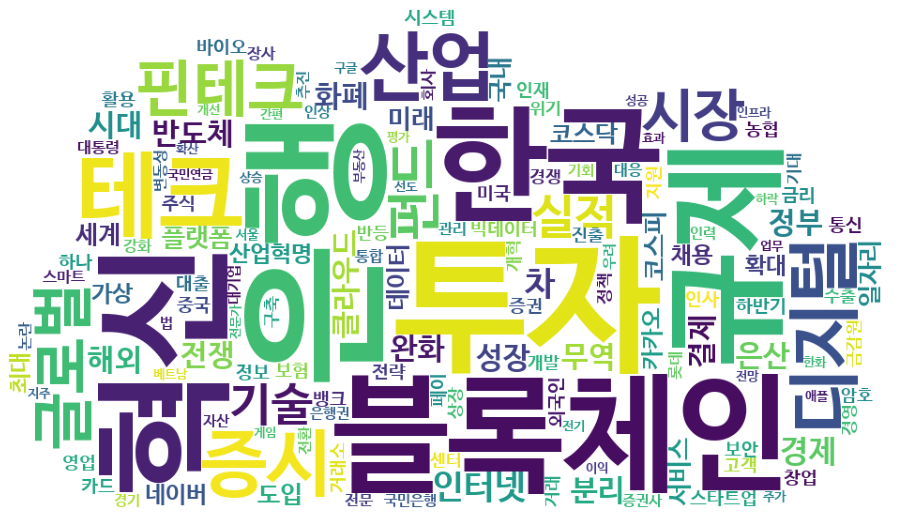

In [ ]:
cloud_2018 = wc.generate_from_frequencies(dict(tags_2018))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2018)
plt.show()
cloud_2018.to_file('it금융2018.png')

In [ ]:
# plt.savefig('it2018.png', bbox_inches='tight')
# cloud_2018.to_file('it2018.png')

### 나. 2019년 it 금융

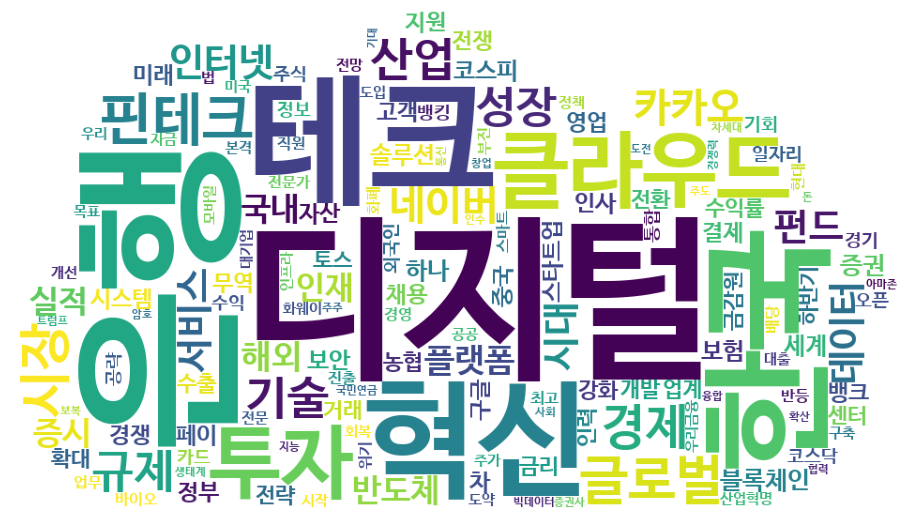

In [ ]:
cloud_2019 = wc.generate_from_frequencies(dict(tags_2019))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2019)
plt.show()
cloud_2019.to_file('it금융2019.png')

### 다. 2020년 it 금융

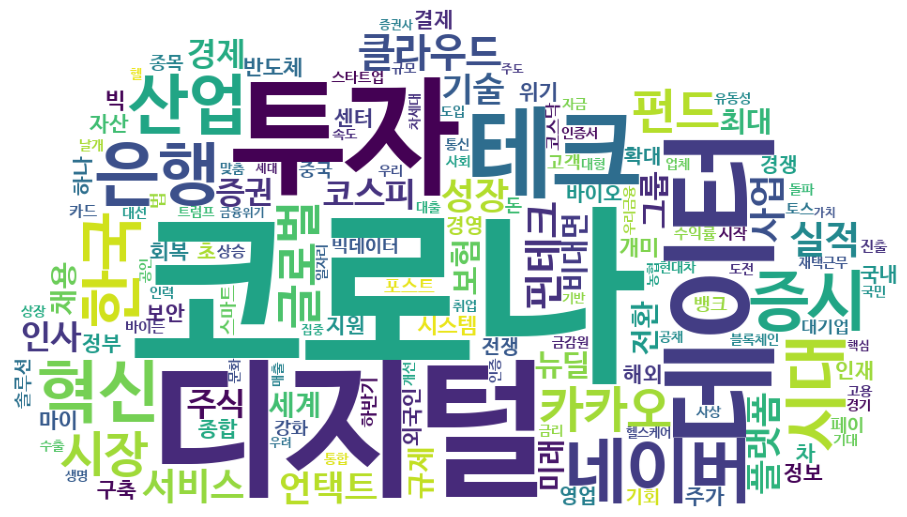

In [ ]:
cloud_2020 = wc.generate_from_frequencies(dict(tags_2020))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2020)
plt.show()
cloud_2020.to_file('it금융2020.png')

### 라. 2021년 it 금융

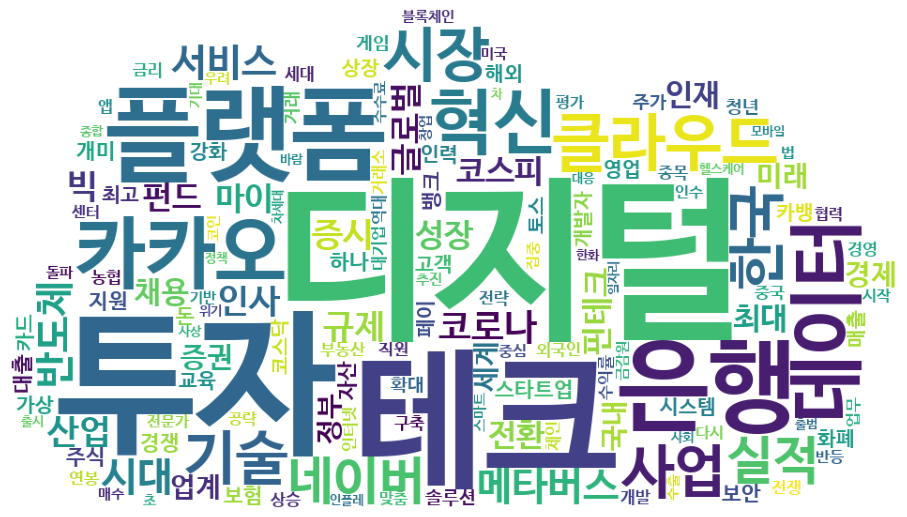

In [ ]:
cloud_2021 = wc.generate_from_frequencies(dict(tags_2021))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2021)
plt.show()
cloud_2021.to_file('it금융2021.png')

### 마. 2022년 it 금융

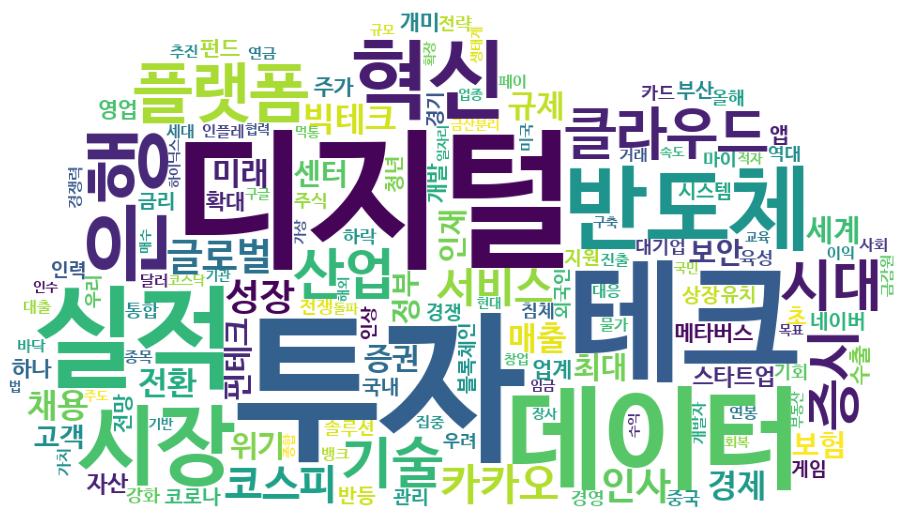

In [ ]:
cloud_2022 = wc.generate_from_frequencies(dict(tags_2022))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(cloud_2022)
plt.show()
cloud_2022.to_file('it금융2022.png')

# 5. 키워드 히스토그램

## 5-1. 상위 10개 키워드만 표시

In [ ]:
tags_2018 = tags_2018[:10]
tags_2019 = tags_2019[:10]
tags_2020 = tags_2020[:10]
tags_2021 = tags_2021[:10]
tags_2022 = tags_2022[:10]

## ~tuple을 dictionary로 변환~



In [ ]:
# converted_tags_2018 = dict((x, y) for x, y in tags_2018)
# print(converted_tags_2018)

{'은행': 187, '투자': 179, '혁신': 162, '블록체인': 157, '한국': 152, '규제': 149, '테크': 142, '산업': 128, '디지털': 122, '증시': 120}


## tuple을 dataframe으로 변환
예쁘게 그리기 위해 seaborn을 사용할 것인데, seaborn은 dataframe을 취급한다.

In [ ]:
df_keys_2018 = pd.DataFrame(tags_2018, columns=['키워드', '빈도'])
df_keys_2019 = pd.DataFrame(tags_2019, columns=['키워드', '빈도'])
df_keys_2020 = pd.DataFrame(tags_2020, columns=['키워드', '빈도'])
df_keys_2021 = pd.DataFrame(tags_2021, columns=['키워드', '빈도'])
df_keys_2022 = pd.DataFrame(tags_2022, columns=['키워드', '빈도'])

In [ ]:
df_keys_2018

,키워드,빈도
0,은행,187
1,투자,179
2,혁신,162
3,블록체인,157
4,한국,152
5,규제,149
6,테크,142
7,산업,128
8,디지털,122
9,증시,120


## 히스토그램 작성

### 2018년 it 금융


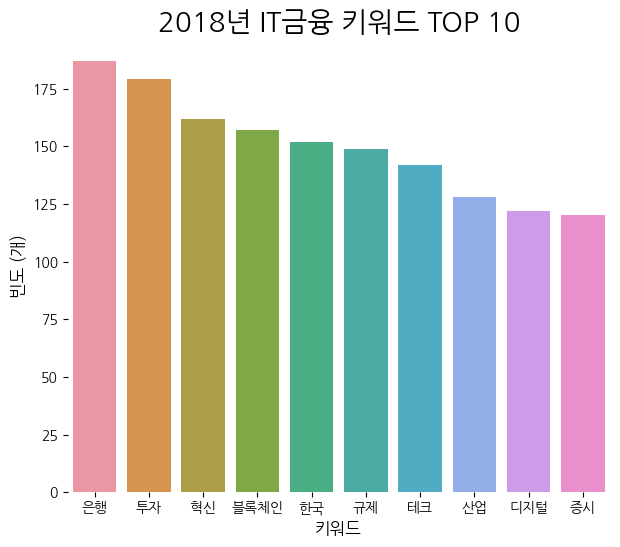

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

fig, ax = plt.subplots(figsize=(7,6), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.set_palette("Accent") # deep, muted, pastel, bright, dark, colorblind.
sns.barplot(
    data=df_keys_2018,
    x='키워드',
    y='빈도',
    
)

# plt.rc("font", family = "Malgun Gothic")
# sns.set(font="Malgun Gothic", 
# rc={"axes.unicode_minus":False}, style='white')
plt.title('2018년 IT금융 키워드 TOP 10', fontsize=20)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도 (개)', fontsize=12)

plt.savefig('2018it금융top10.png')

### 2019년 it 금융

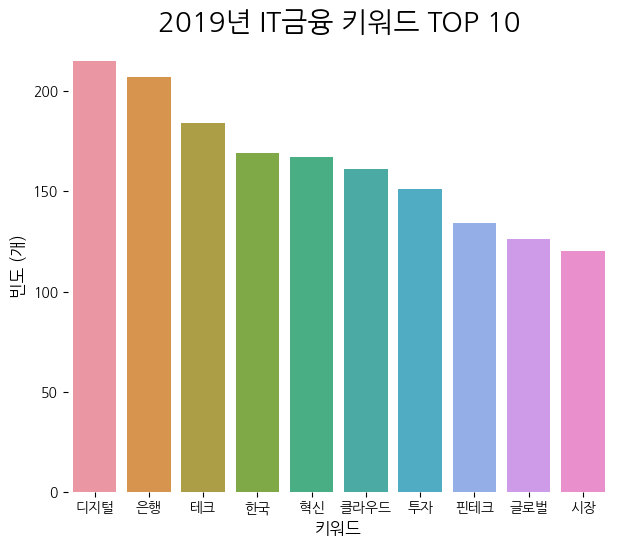

In [ ]:
fig, ax = plt.subplots(figsize=(7,6), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.set_palette("Accent") # deep, muted, pastel, bright, dark, colorblind.
sns.barplot(
    data=df_keys_2019,
    x='키워드',
    y='빈도'
)
plt.title('2019년 IT금융 키워드 TOP 10', fontsize=20)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도 (개)', fontsize=12)

plt.savefig('2019it금융top10.png')

### 2020년 it 금융

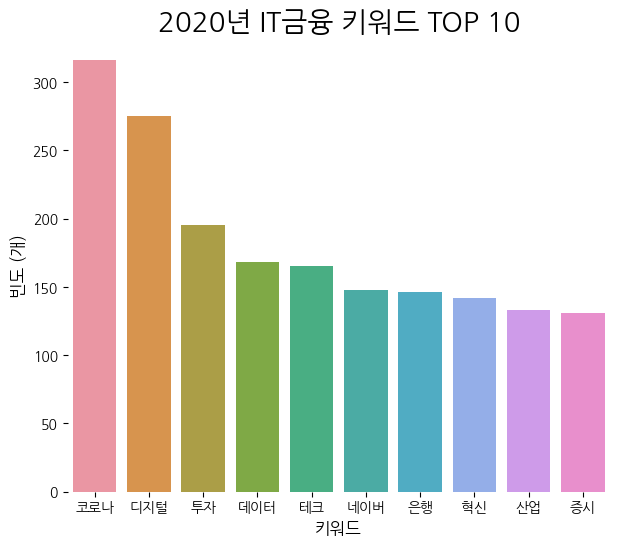

In [ ]:
fig, ax = plt.subplots(figsize=(7,6), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.set_palette("Accent") # deep, muted, pastel, bright, dark, colorblind.
sns.barplot(
    data=df_keys_2020,
    x='키워드',
    y='빈도'
)
plt.title('2020년 IT금융 키워드 TOP 10', fontsize=20)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도 (개)', fontsize=12)

plt.savefig('2020it금융top10.png')

### 2021년 it 금융

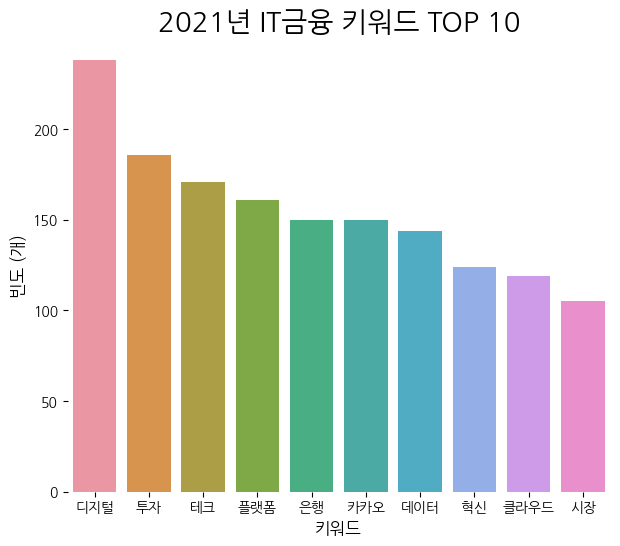

In [ ]:
fig, ax = plt.subplots(figsize=(7,6), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.set_palette("Accent") # deep, muted, pastel, bright, dark, colorblind.
sns.barplot(
    data=df_keys_2021,
    x='키워드',
    y='빈도'
)
plt.title('2021년 IT금융 키워드 TOP 10', fontsize=20)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도 (개)', fontsize=12)

plt.savefig('2021it금융top10.png')

### 2022년 it 금융

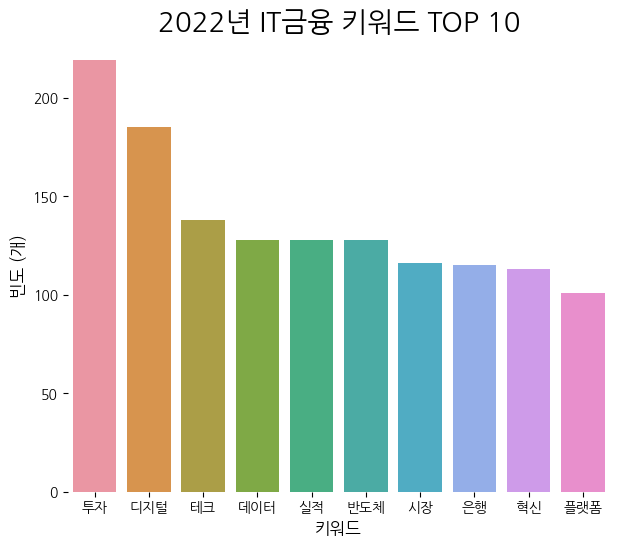

In [ ]:
fig, ax = plt.subplots(figsize=(7,6), dpi=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.set_palette("Accent") # deep, muted, pastel, bright, dark, colorblind.
sns.barplot(
    data=df_keys_2022,
    x='키워드',
    y='빈도'
)
plt.title('2022년 IT금융 키워드 TOP 10', fontsize=20)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도 (개)', fontsize=12)

plt.savefig('2022it금융top10.png')